In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv('./../Data/data.csv')

In [19]:
route_setting = 'trafast'
total_route = [
    (0, 39), (39, 40), (40, 46), (46, 7), (7, 11), (11, 0)
]

100%|██████████| 6/6 [00:00<00:00, 141.79it/s]


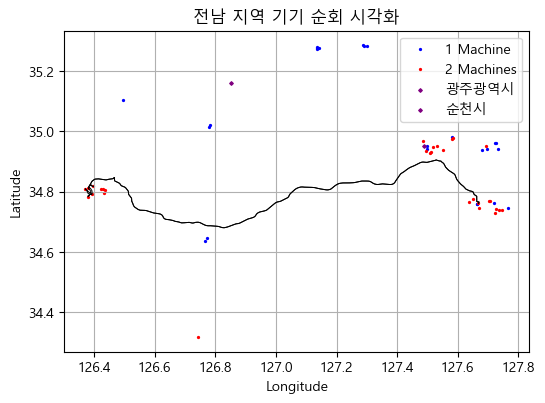

In [20]:
df1 = df[df.machine == 1]
df2 = df[df.machine == 2]

# figsize 비율 계산
ratio = (df.latitude.max() - df.latitude.min()) / (df.longitude.max() - df.longitude.min())
scale = 6

# fig, ax 객체 생성
fig, ax = plt.subplots(figsize=(scale, scale * ratio))

for start_idx, goal_idx in tqdm(total_route):
    if start_idx > goal_idx:
        temp = start_idx
        start_idx = goal_idx
        goal_idx = temp

    file_path = f"./../Data/routes/route_{start_idx}_{goal_idx}.json"
    
    with open(file_path, 'r') as file:
        data = json.load(file)
    route = data['route'][route_setting][0]['path']

    # x, y좌표 생성
    x_coords = [point[0] for point in route]
    y_coords = [point[1] for point in route]

    # 선분 plot
    ax.plot(x_coords, y_coords, linewidth=0.7, c='black')

# 데이터 플롯
ax.scatter(df1['longitude'], df1['latitude'], s=1.8, c='blue', label='1 Machine')
ax.scatter(df2['longitude'], df2['latitude'], s=1.8, c='red', label='2 Machines')
ax.scatter(126.85302648386, 35.159003310519, s=3, c='purple', marker='D', label='광주광역시')
ax.scatter(127.487222, 34.950694, s=3, c='purple', marker='D', label='순천시')

# 축 레이블, 제목 및 범례 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('전남 지역 기기 순회 시각화')
ax.grid()

# 그래프를 보여줍니다.
ax.legend()
plt.show()